In [4]:
from google.colab import files
import csv
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

import sklearn
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
nb_classes = 2

In [3]:
uploaded = files.upload()
!unzip training.zip

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: training/train_ecg_01001.mat  
  inflating: training/train_ecg_01002.mat  
  inflating: training/train_ecg_01003.mat  
  inflating: training/train_ecg_01004.mat  
  inflating: training/train_ecg_01005.mat  
  inflating: training/train_ecg_01006.mat  
  inflating: training/train_ecg_01007.mat  
  inflating: training/train_ecg_01008.mat  
  inflating: training/train_ecg_01009.mat  
  inflating: training/train_ecg_01010.mat  
  inflating: training/train_ecg_01011.mat  
  inflating: training/train_ecg_01012.mat  
  inflating: training/train_ecg_01013.mat  
  inflating: training/train_ecg_01014.mat  
  inflating: training/train_ecg_01015.mat  
  inflating: training/train_ecg_01016.mat  
  inflating: training/train_ecg_01017.mat  
  inflating: training/train_ecg_01018.mat  
  inflating: training/train_ecg_01019.mat  
  inflating: training/train_ecg_01020.mat  
  inflating: training/train_ecg_01021.mat  
  inflati

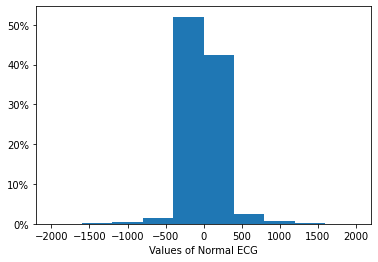

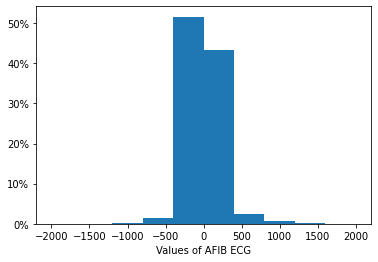

In [6]:
normal_ecg_size=np.array([])
afib_ecg_size=np.array([])
normal_ecg_values=np.array([])
afib_ecg_values=np.array([])
with open('training/REFERENCE.csv') as csv_file:      # Einlesen der Liste mit Dateinamen und Zuordnung
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
      data = sio.loadmat('training/'+row[0]+'.mat')   # Import der EKG-Dateien
      ecg_lead = data['val'][0]
      if row[1] != 'A':                                  
        normal_ecg_size=np.append(normal_ecg_size,ecg_lead.size) # measure amount of normal ecgs
        normal_ecg_values=np.append(normal_ecg_values,ecg_lead)#safe all normal values
      if row[1]=='A':                                     
        afib_ecg_size=np.append(afib_ecg_size,ecg_lead.size)# measure amount of afib ecgs             
        afib_ecg_values=np.append(afib_ecg_values,ecg_lead)#safe all afib values

plt.hist(normal_ecg_size, weights=np.ones(len(normal_ecg_size)) / len(normal_ecg_size)) 
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("length of Normal ECG")
plt.show()

plt.hist(normal_ecg_size, weights=np.ones(len(normal_ecg_size)) / len(normal_ecg_size),bins=3) 
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("length of Normal ECG")
plt.show()

plt.hist(afib_ecg_size, weights=np.ones(len(afib_ecg_size)) / len(afib_ecg_size)) 
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("length of AFIB ECG")
plt.show()

plt.hist(afib_ecg_size, weights=np.ones(len(afib_ecg_size)) / len(afib_ecg_size),bins=3) 
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("length of AFIB ECG")
plt.show()

plt.hist(normal_ecg_values, weights=np.ones(len(normal_ecg_values)) / len(normal_ecg_values),range=[-2000, 2000]) 
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Values of Normal ECG")
plt.show()

plt.hist(afib_ecg_values, weights=np.ones(len(afib_ecg_values)) / len(afib_ecg_values),range=[-2000, 2000]) 
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Values of AFIB ECG")
plt.show()
